
# No showings appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

 | Column |Description |
 |:-----|:-----|
 |**'PatientId'** | Identification of a patient.|
 |**'AppointmentID'** |Identification of each appointment.|
 |**'Gender'** | Male or Female. |
 |**'ScheduledDay'** | tells us on what day the patient set up their appointment.|
 |**'AppointmentDay'** | The day of the actuall appointment, when they have to visit the doctor.|
 |**'Age'** | How old is the patient.|
 |**'Neighborhood'** | indicates the location of the hospital.|
 |**'Scholarship'** | indicates whether or not the patient is enrolled in Brasilian welcare program Bolsa Família.|
 |**'Hipertension'**|  True or False.|
 |**'Diabetes'** | True or False.|
 |**'Alcoholism'** | True or False.|
 |**'Handcap'** | True or False.|
 |**'SMS_received'** | messages sent to the patient.|
 |**'No-show'** | True or False; it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.|

 I would like to see what factors are important to predict someone will show up for their scheduled appointment.



## Questions

* Q1. Number of handicaps are related to no-show appointments?
* Q2. How does the gender of a patient affect their likelihood to show or not show up for their appointment?
* Q3. Is there a correlation between not receive a message and no-shown patients?
* Q4. Is there a correlation between having a longer time between schedule and appointment day and the likelihood to not show?
* Q5. To whom SMS were sent? Is there a correlation between pre booked time and SMS receivers?
* Q6. Is there a correlation between the age and no-shown patients?


### Importing packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 9.7+ MB


 **What we can see as an overview of the data:**
 * There are 110.527 entries and 14 columns.
 * I'll rename column names to be more readable and in a consistent format.
 * Handcap should be renamed as Handicap for clarification. 
 * I'll also convert PatientId to int.
 * ScheduledDay and AppointmentDay are not date formated, so will convert to date types.
 * No missing values, so we do not need to work with nulls. 


In [4]:
# Convert to date types
df.PatientId = df.PatientId.astype('int64')
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,29872499824296,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,558997776694438,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4262962299951,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,867951213174,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8841186448183,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
# Rename column names
labels = ['patient_ID', 'appointment_ID', 'gender', 'scheduled_day', 'appointment_day','age',
          'neighbourhood', 'scholarship', 'hypertension','diabetes', 'alcoholism',
          'handicap', 'sms_received', 'no_show']
df.columns = labels
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_ID       110527 non-null  int64         
 1   appointment_ID   110527 non-null  int64         
 2   gender           110527 non-null  object        
 3   scheduled_day    110527 non-null  datetime64[ns]
 4   appointment_day  110527 non-null  datetime64[ns]
 5   age              110527 non-null  int64         
 6   neighbourhood    110527 non-null  object        
 7   scholarship      110527 non-null  int64         
 8   hypertension     110527 non-null  int64         
 9   diabetes         110527 non-null  int64         
 10  alcoholism       110527 non-null  int64         
 11  handicap         110527 non-null  int64         
 12  sms_received     110527 non-null  int64         
 13  no_show          110527 non-null  object        
dtypes: datetime64[ns](2)

In [144]:
df.duplicated().sum()

0

 No duplicated data

In [6]:
#For clarification I will change the type to categorical and rename the categories
df.no_show = df.no_show.astype('category')
df.no_show.cat.rename_categories({'No':'Show','Yes':'No Show'}, inplace = True)
df.no_show.value_counts()

Show       88208
No Show    22319
Name: no_show, dtype: int64

### Analyze data values

In [160]:
df.describe()

,patient_ID,appointment_ID,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921700e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


As we can see above 
* The Age column may have incorrect values
* The Handicap column has values from 0 to 4, while it says is a boolean data type

In [7]:
##Evaluate Age values
df.age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

There is just 1 person with Age = -1, we will drop it

In [7]:
##Drop negative ages
df.drop(df.query('age == -1').index, inplace = True)

In [164]:
#Check we drop it correctly
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [165]:
## Analyze if there are duplicade appointments
df.appointment_ID.nunique()

110526

In [9]:
# Analyze Handicap values
df.handicap.value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

In [10]:
df.handicap.value_counts(normalize = True)

0    0.979724
1    0.018475
2    0.001656
3    0.000118
4    0.000027
Name: handicap, dtype: float64

**Handicap** is not a Boolean field, with some research in Kaggle I found that it refers to the number of disabilities from the patient or the type of disability.

I will now calculate the **delta time** between ScheduledDay and AppointmentDay, and create a new column to store the difference.

In [8]:
df['delta_time'] = (df.appointment_day - df.scheduled_day).dt.days
df.query('delta_time < 0')[['scheduled_day','appointment_day', 'delta_time']]


,scheduled_day,appointment_day,delta_time
27033,2016-05-10,2016-05-09,-1
55226,2016-05-18,2016-05-17,-1
64175,2016-05-05,2016-05-04,-1
71533,2016-05-11,2016-05-05,-6
72362,2016-05-04,2016-05-03,-1


5 appointment reservations has been scheduled after the appointment day, that can not be done, so I will remove this data.

In [9]:
df = df.query('delta_time >= 0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   patient_ID       110521 non-null  int64         
 1   appointment_ID   110521 non-null  int64         
 2   gender           110521 non-null  object        
 3   scheduled_day    110521 non-null  datetime64[ns]
 4   appointment_day  110521 non-null  datetime64[ns]
 5   age              110521 non-null  int64         
 6   neighbourhood    110521 non-null  object        
 7   scholarship      110521 non-null  int64         
 8   hypertension     110521 non-null  int64         
 9   diabetes         110521 non-null  int64         
 10  alcoholism       110521 non-null  int64         
 11  handicap         110521 non-null  int64         
 12  sms_received     110521 non-null  int64         
 13  no_show          110521 non-null  category      
 14  delta_time       110


## Assessing and cleaning Results:

 * There are 110.527 entries and 14 columns.
 * I'll rename column names to be more readable and in a consistent format.
 * Handcap should be renamed as Handicap for clarification, in addition, values are not a boolean, with some research I found that it refers to the number of disabilities from the patient.
 * I'll also convert PatientId to int.
 * ScheduledDay and AppointmentDay are not date formated, so will convert to date types.
 * No missing values, so we do not need to work with nulls. 
 * There were no duplicated values in the dataset.
 * The Age column had incorrect values, we dropped the row that had Age equal to one, and deleted some outliers.
 * There were some appointments scheduled after the appointment date, so I removed this data.





<a id='eda'></a>
## Exploratory Data Analysis



Text(0, 0.5, 'Percentage of the appointments')

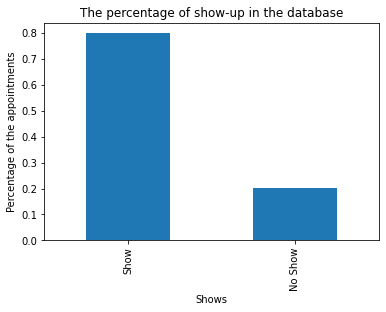

In [24]:
df.no_show.value_counts(normalize = True).plot(kind='bar')
plt.title("The percentage of show-up in the database")
plt.xlabel("Shows")
plt.ylabel("Percentage of the appointments")

Almost 80% of the Appointments have showed up , while a 20% did not.


###  Q1. Number of handicaps are related to no-show appointments?

In [324]:
df.handicap.value_counts(normalize = True)

0    0.979741
1    0.018458
2    0.001656
3    0.000118
4    0.000027
Name: handicap, dtype: float64

I am going to make two different assumptions:
* one if Handicaps is the number of disabilities
* second handicaps is the type of disability. 

Text(0, 0.5, 'Percentage of Shows')

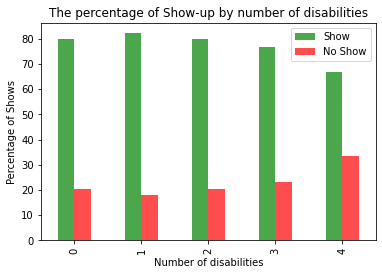

In [11]:

def percentage_plot(counts, groupby_level, graph_type, colors):
    percent = (counts / counts.groupby(level=groupby_level).sum() * 100).unstack()
    return percent.plot(kind = graph_type, color = colors, alpha = .7)

colors = ('green', 'red')
counts = df.groupby('handicap')['no_show'].value_counts()
percentage_plot(counts, 0, 'bar', colors)

plt.legend()
plt.title("The percentage of Show-up by number of disabilities")
plt.xlabel("Number of disabilities")
plt.ylabel("Percentage of Shows")

**Conclusions**

- 98% of the pacients do not have any disability, there is not enought data to take decisions.

Depending on the data definition:
- Pacients with more than 2 disabilities have a greater tendency to no-show
- Pacients with disability 4 tend to no show more often than other type of patients, but there are just 3 cases in our dataset, so we are not able to take conclusions. 

### Q2. How does the gender of a patient affect their likelihood to show or not show up for their appointment?

In [190]:
df.gender.value_counts(normalize = True)

F    0.649976
M    0.350024
Name: gender, dtype: float64

In [21]:
df.gender.value_counts()

F    71836
M    38685
Name: gender, dtype: int64

It is clear that there are much more females making appointments than males.
The numbers above correspond to the number of appointments , let's take a look into it, and see by number of patients.
One patientId can book different appointments (appointmentID)

In [12]:
df_patient = df.groupby(['patient_ID','gender']).size().reset_index(name='count')
df_patient.head()

,patient_ID,gender,count
0,39217,F,1
1,43741,M,1
2,93779,F,1
3,141724,M,1
4,537615,F,1


Text(0, 0.5, 'Percentage of appointments')

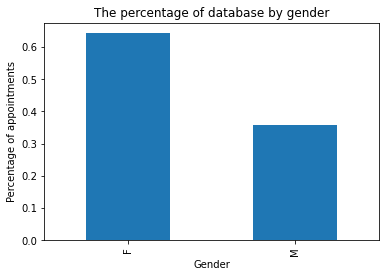

In [23]:
df_patient.gender.value_counts(normalize = True).plot(kind = 'bar')
plt.title("The percentage of database by gender")
plt.xlabel("Gender")
plt.ylabel("Percentage of appointments")

Still almost the same values. The dataset contains 36% male patients and 64% female patients.

Text(0, 0.5, 'Percentage of Shows')

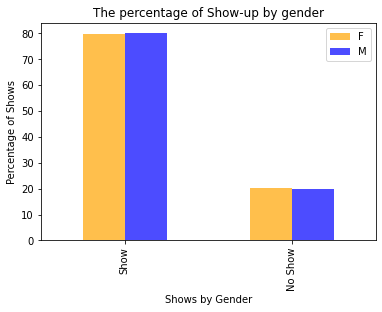

In [14]:
## What gender tends to show up more

colors = ('orange', 'blue')
counts = df.groupby('no_show')['gender'].value_counts()
percentage_plot(counts, 1, 'bar', colors)

plt.legend()
plt.title("The percentage of Show-up by gender")
plt.xlabel("Shows by Gender")
plt.ylabel("Percentage of Shows")

In [237]:
##As numbers are really close, I prefer to see them in a table
gender_percent

gender,F,M
no_show,,
Show,79.688457,80.03619
No Show,20.311543,19.96381


We can see that the proportion of males and female that show-up are similar. 
Approximately 80% of male/female showed-up on their appointments, while about 20% didn't show.


**Conclusions**

- The dataset contains more women than men. Approximately 65% of the appointments are from females and 35% are males. 
- Also, we seen that our database have more female patients than males. Approximately 64% of the patients are females.
- We can see that the proportion of males and female that show-up are similar. Approximately 80% of male/female showed-up on their appointments, while about 20% didn't show.

So, it seems that gender does not affect significatelly on the likelihood to show or not for their appointment 


### Q3. Is there a correlation between not receive a message and no-shown patients?

In [238]:
df.sms_received.value_counts(normalize = True)

0    0.678957
1    0.321043
Name: sms_received, dtype: float64

Approximately a 32% of the appointments in our database have received an SMS

Text(0, 0.5, 'Percentage of Shows')

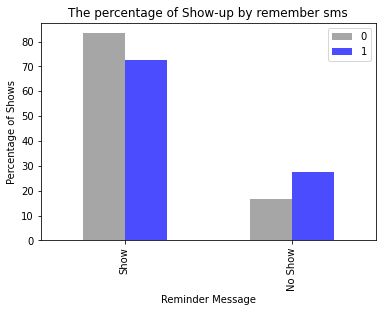

In [20]:
## See no_show by SMS to show up more

colors = ('grey', 'blue')
counts = df.groupby('no_show')['sms_received'].value_counts()
percentage_plot(counts, 1, 'bar', colors)

plt.legend()
plt.title("The percentage of Show-up by remember sms")
plt.xlabel("Reminder Message")
plt.ylabel("Percentage of Shows")

As the opposite as I would expected, appointments that received an SMS, tends to no show-up more than appointments who didn't received an SMS. 
Is that posible that SMS has been send to a particular appointments that tends to no show-up. Maybe appointments that have a greater delta time between beeing scheduled and the appointment day?

**Conclusions**

- Approximately a 32% of the appointments in our database have received an SMS. 
- Having received an SMS seems to decrease the posibility to show-up for an appointment, the opposite as I would expected. That does not seem coherent.


So, it seems that receive an SMS does not affect significatelly on the likelihood to show or not for their appointment. I am going to work to understand if delta time has a correlation with the likelihood to show or not. 

### Q4. Is there a correlation between having a longer time between schedule and appointment day and the likelihood to not show?

In [247]:
df.delta_time.describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: delta_time, dtype: float64

A large portion of the appointments were scheduled on the same day that the visit, since the min and 25% values are 0.00. Also we are going to consider the week before as another group, since the 50% values are less than 4.00.
Also, there is at least one appointment scheduled 179 days before the visit, approximately 6 months in advance.

Around 75% of the appointments were scheduled at most 3 weeks before.

In [272]:
df.query("delta_time >7").delta_time.describe()

count    39774.000000
mean        25.207447
std         16.856728
min          8.000000
25%         14.000000
50%         21.000000
75%         31.000000
max        179.000000
Name: delta_time, dtype: float64

I am gonna consider 2 weeks and 3 weeks, since the 25% and 50% values are 14.00 and 21.00 .

In [273]:
df.query("delta_time >21").delta_time.describe()

count    18875.000000
mean        37.504106
std         17.095761
min         22.000000
25%         27.000000
50%         32.000000
75%         42.000000
max        179.000000
Name: delta_time, dtype: float64

Also, 2 months and last group until 6 months

In [294]:
bin_edges = [-1, 0, 7, 14, 21, 31, 62, 180]
bin_names = ['same_day', '1_week', '2_week', '3_week', '1_month', '2_month', '6_month']
df.delta_time_cat = pd.cut(df.delta_time, bin_edges, bin_names)
df.delta_time_cat.value_counts()


(-1, 0]      38562
(0, 7]       32185
(7, 14]      12025
(21, 31]      9169
(14, 21]      8874
(31, 62]      7939
(62, 180]     1767
Name: delta_time_cat, dtype: int64

Text(0, 0.5, 'Percentage of Shows')

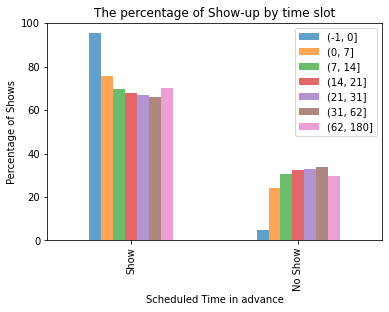

In [295]:
## See no_show by SMS to show up more

counts = df.groupby('no_show')['delta_time_cat'].value_counts()
gender_percent = (counts / counts.groupby(level=1).sum() * 100).unstack()
gender_percent.plot(kind = 'bar', alpha = .7)

plt.legend()
plt.title("The percentage of Show-up by time slot")
plt.xlabel("Scheduled Time in advance")
plt.ylabel("Percentage of Shows")

There is a consistent decrease in the percentage of appointments that showed up as the pre booked time increases.

**Conclusions**

- More than a 25% of the appointments in our database were scheduled same date of the visit.
- Approximately 75% of the appointments were scheduled at most 3 weeks before.
- There is a consistent decrease in the percentage of appointments that showed up as the pre booked time increases.


So, it seems that as time increases between dates affect significatelly on the likelihood to show or not for the appointment.


### Q5. To whom SMS were sent? Is there a correlation between pre booked time and SMS receivers?

In [298]:
df.query('sms_received == 1').delta_time.describe()

count    35482.000000
mean        19.016713
std         16.978718
min          3.000000
25%          7.000000
50%         14.000000
75%         27.000000
max        179.000000
Name: delta_time, dtype: float64

Appointments who received SMS where the ones with a time lapse at least of 3 days between book day and the visit. 

Text(0, 0.5, '% of appointments with/without SMS')

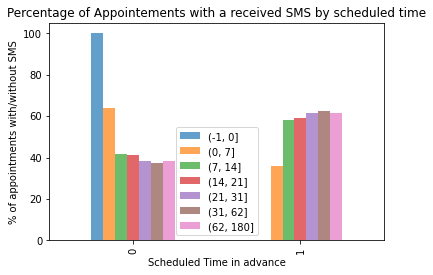

In [307]:
## See no_show by SMS to show up more


counts = df.groupby('sms_received')['delta_time_cat'].value_counts()
gender_percent = (counts / counts.groupby(level=1).sum() * 100).unstack()
gender_percent.plot(kind = 'bar', alpha = .7)

plt.legend()
plt.title("Percentage of Appointements with a received SMS by scheduled time")
plt.xlabel("Scheduled Time in advance")
plt.ylabel("% of appointments with/without SMS")

There is a consistent increase in the percentage of appointments that received an SMS as the pre booked time increases.

**Conclusions**

- Appointments who received SMS where the ones with a time lapse at least of 3 days between book day and the visit. 
- There is a consistent decrease in the percentage of appointments that showed up as the pre booked time increases.


So, it seems that SMS were sent to more appointments as time increases between dates. 


### Q6. Is there a correlation between the age and no-shown patients?

In [309]:
df.age.describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

In [318]:
df.age.value_counts()

0      3539
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: age, Length: 103, dtype: int64

A large portion of the appointments were scheduled for patients between 0-2 years. Also, patients from 49 - 54 years.

Text(0, 0.5, 'Number of appointments')

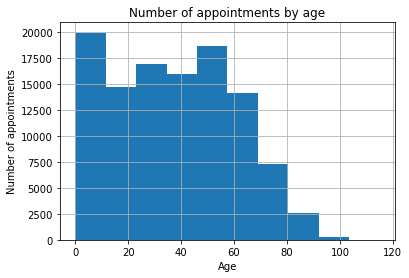

In [19]:
df.age.hist()
plt.title("Number of appointments by age")
plt.xlabel("Age")
plt.ylabel("Number of appointments")

Text(0, 0.5, 'Percentage of appointments that show')

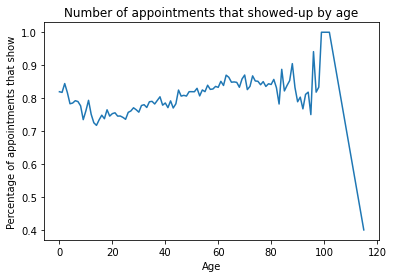

In [18]:
percent_shows = df.query('no_show == "Show"').groupby(['age']).size() / df.groupby(['age']).size() 
percent_shows.plot()
plt.title("Number of appointments that showed-up by age")
plt.xlabel("Age")
plt.ylabel("Percentage of appointments that show")

It seems that the likelihood of shows is not affected much by the age. Ratio is high on minimun and maximum ages, in vulnerable poblation. After minimum ages it decreases a bit and after tends to increase slowly while age increases.
Also , seems that we have some outliers with an age greater than 100.


**Conclusion**

- A large portion of the appointments were scheduled for patients between 0-2 years. Also, patients from 49 - 54 years.
-  Ratio is high on minimun and maximum ages, in vulnerable poblation. After minimum ages it decreases a bit and after tends to increase slowly while age increases.
- Also , seems that we have some outliers with an age greater than 100.



So, it seems that the likelihood of shows is not affected much by the age.

<a id='conclusions'></a>
## Conclusions

In the fist section, I renamed columns, changed datatypes, removed incorrect data with negative Age and scheduled appointments after the visit date. 
 
After this , with the database given we can make a lot more of investigations, but with the work done I can't make definetely conclusions about the features affecting the show likelihood for scheduled appointments. Let's summarize below:

- Seems that people with more than 2 **disabilities** or disabilities 2,3,4 can affect on the likelihood of the patient to show or not for the appointment, but dataset has just a 2% of appointments that has a disability. 

- **Gender** does not affect significatelly on the likelihood to show-up, we can see similar behaviours on both genders, approximately 80% of appointments showed-up. 

- Approximately 65% of the appointments are from females and 35% are males. That makes sense, when we seen that our database have more female patients than males. Approximately 64% of the patients are females. We can conclude than in our database, females tend to book more appointments than males. 
- From our database results, receive an **SMS** does not affect significatelly on the likelihood to show or not for their appointment. As in our plots having received an SMS tells us that decrease the posibility to show-up for an appointment. So I went further to see who received those SMS. 
- Just a 32% of the appointments in our database have **received an SMS**. Appointments who received SMS where the ones with a **time lapse at least of 3 days** between book and visit dates. In addition, SMS were sent to more appointments as time increases between dates. So, were sent to people with higher probabilities to no-show. This clarifies the bullet above. 
-  As we seen in our database, time increases between book and visit dates affect significatelly on the likelihood to show or not for the appointment. More than a 25% of the appointments in our database were scheduled same date of the visit.
- Seems that the likelihood of shows is **not affected much by the age**. But we can conclude than more "vulnerable" people, minimum and maximum ages, tend to show-up more than the rest of the appointments.



**Limitations**

- **Appointment Day** has no hour and minutes on the data while Scheduled Day has, this will give us a bit more information to analyze.
- To make asumptions in **Handicap**, descriptions need to be specified, and we need more data, as now theres just a 2% of appointments with a disability.

 

